In [5]:
# pip install tensorflow


In [6]:
## a. Import the necessary packages -->
import tensorflow as tf
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [7]:
# b. Load the training and testing data (MNIST/CIFAR10) -->

# Splitting it into training and testing data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train / 255
x_test = x_test / 255


In [8]:
# c. Define the network architecture using Keras   -->
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),#The input layer, which flattens the 28x28 pixel images into a 1D array.
    keras.layers.Dense(128, activation="relu"),#A hidden layer with 128 neurons and a ReLU activation function.
    keras.layers.Dense(10,activation="softmax")#An output layer with 10 neurons (one for each digit) and a softmax activation function.
])


In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# d. Train the model using SGD  -->
model.compile(optimizer="sgd",
loss="sparse_categorical_crossentropy",
metrics=['accuracy'])
# The model is compiled with stochastic gradient descent (SGD) as the optimizer, sparse categorical cross-entropy as the loss
#function, and accuracy as the metric to track during training.

history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)
# The fit method is used to train the model with the training data. The training is performed for 5 epochs.


Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6730 - accuracy: 0.8287 - val_loss: 0.3595 - val_accuracy: 0.9037
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3375 - accuracy: 0.9062 - val_loss: 0.2927 - val_accuracy: 0.9196
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2875 - accuracy: 0.9195 - val_loss: 0.2590 - val_accuracy: 0.9295
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2565 - accuracy: 0.9278 - val_loss: 0.2370 - val_accuracy: 0.9339
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2337 - accuracy: 0.9346 - val_loss: 0.2181 - val_accuracy: 0.9386


313/313 [==============================] - 1s 2ms/step - loss: 0.2181 - accuracy: 0.9386
Loss=0.218
Accuracy=0.939


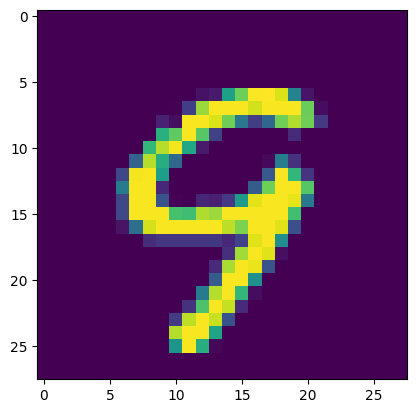

313/313 [==============================] - 1s 2ms/step


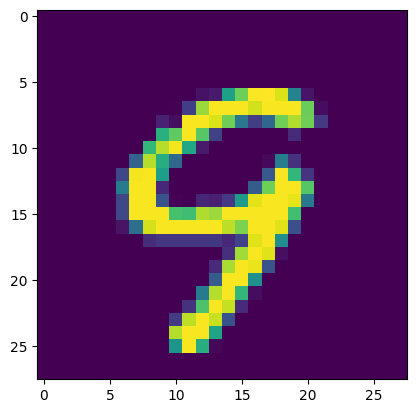

In [11]:
# e. Evaluate the network   -->
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
# The code evaluates the model's performance on the testing data, calculating the loss and accuracy.

n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()
# This part plots the training and validation accuracy over the epochs.
# Similarly, this section plots the training and validation loss over the epochs.


In [12]:
print('Predicted value:', predicted_value[n])
# Lastly, you generate a random number n, display the corresponding test image, make predictions on the test set, and show the
#image again with the predicted value.

Predicted value: [1.1793842e-04 8.4814815e-08 7.4237410e-05 1.6887551e-04 1.0499244e-02
 1.7294007e-03 1.2782442e-04 2.2614093e-03 2.0113832e-03 9.8300964e-01]


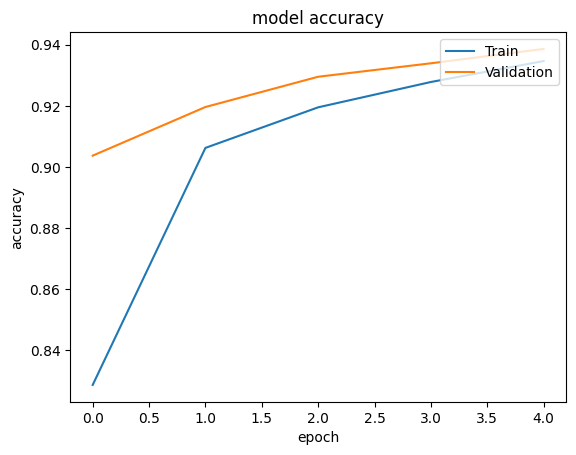

In [13]:
# f. Plot the training loss and accuracy  -->

#Plotting the training accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


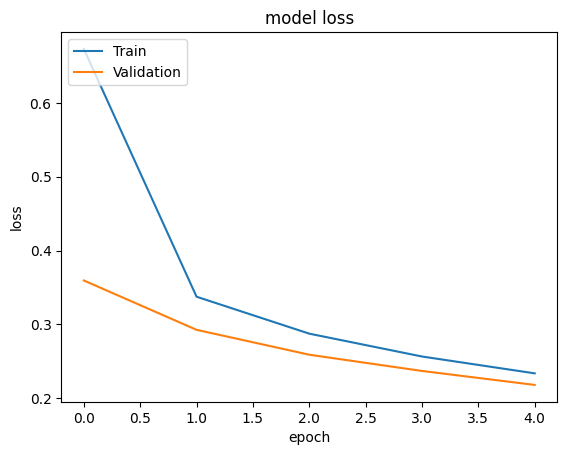

In [14]:
#Plotting the training loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()